## 프로젝트 1. 경사 하강법으로 이미지 복원하기

### 프로젝트 개요와 목표

이번 프로젝트에서 우리가 풀 문제는 다음과 같습니다.

이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌습니다. 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황입니다. 다행히도 weird_function()의 소스코드는 남아 있습니다. 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해봅시다.

*참고자료: https://github.com/jcjohnson/pytorch-examples, NYU Intro2ML*

In [2]:
import torch
import pickle
import matplotlib.pyplot as plt

In [4]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

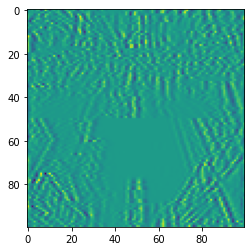

In [5]:
plt.imshow(broken_image.view(100,100)) 

In [6]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [7]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [8]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [9]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.432568550109863
Loss at 1000 = 1.1425156593322754
Loss at 2000 = 0.544658362865448
Loss at 3000 = 0.37849748134613037
Loss at 4000 = 0.29933279752731323
Loss at 5000 = 0.2507816553115845
Loss at 6000 = 0.21584472060203552
Loss at 7000 = 0.1880754679441452
Loss at 8000 = 0.164549320936203
Loss at 9000 = 0.14374473690986633
Loss at 10000 = 0.12478774040937424
Loss at 11000 = 0.1071363314986229
Loss at 12000 = 0.09043677896261215
Loss at 13000 = 0.07444820553064346
Loss at 14000 = 0.0590033158659935
Loss at 15000 = 0.04398619011044502
Loss at 16000 = 0.02931823767721653
Loss at 17000 = 0.02115318365395069
Loss at 18000 = 0.021165303885936737
Loss at 19000 = 0.021167252212762833


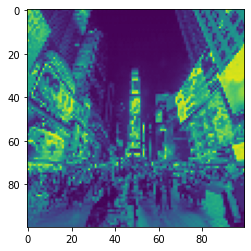

In [10]:
plt.imshow(random_tensor.view(100,100).data)

# 201700949 설재혁